# Projeto em Andamento reanalizar e refazer

já apresentado em aula

In [118]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

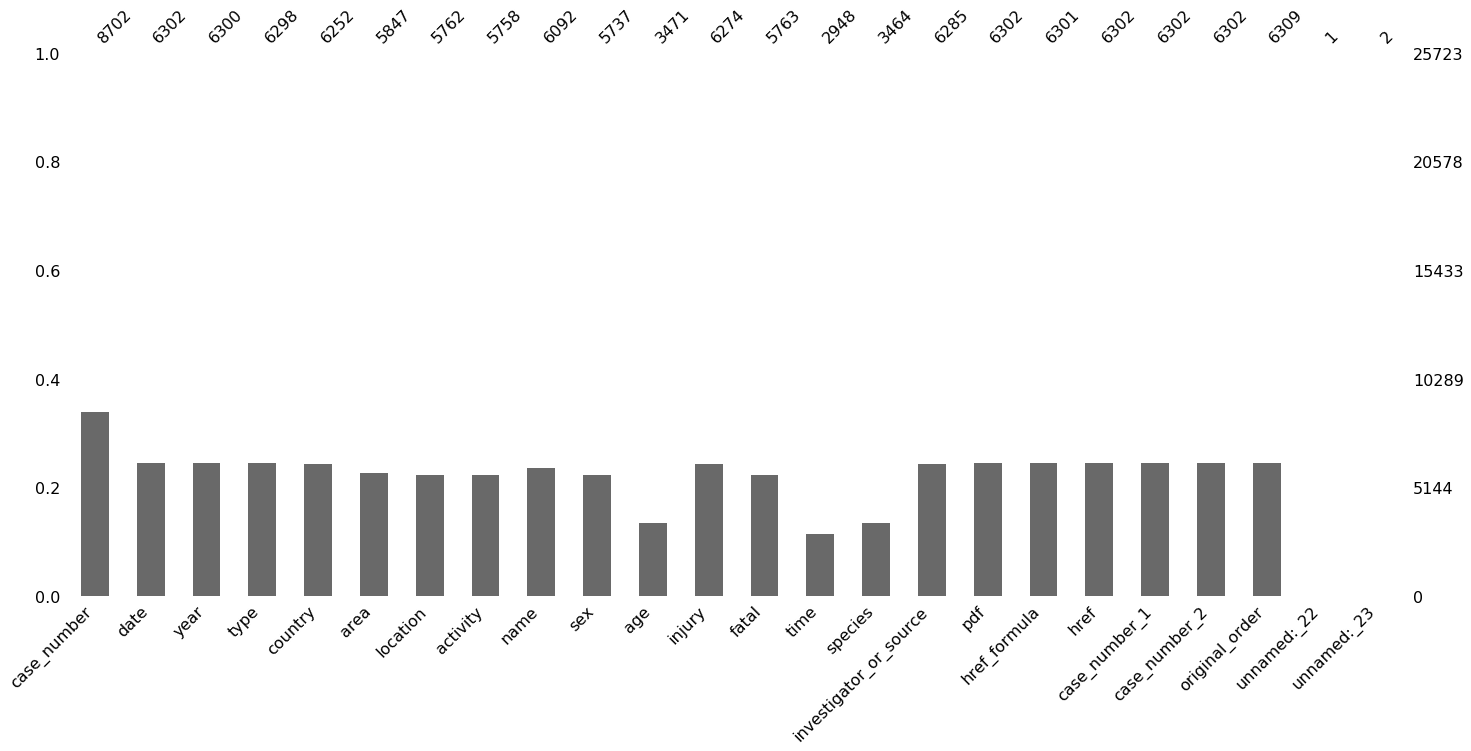

In [119]:
msno.bar(attack)

In [120]:
attack = pd.read_csv('C:/Users/User/Aulas_ironhack/Projeto_Shark_Attacks/attacks.csv', encoding='latin')

In [121]:
attack.shape

(25723, 24)

In [122]:
pd.options.display.max_columns = 25

In [123]:
pd.set_option('display.max_rows', 100)

In [124]:
attack.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [125]:
attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [126]:
#organizando as colunas

In [127]:
attack.shape

(25723, 24)

In [128]:
attack.columns = [col.lower().replace(' ','_').replace('.','_') for col in attack.columns]
attack = attack.rename({'sex_':'sex','species_':'species','fatal_(y/n)':'fatal'}, axis = 1)

In [129]:
attack.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [130]:
#dropando colunas sem informações

In [131]:
attack_dropped = attack.drop(attack[['case_number','unnamed:_22','unnamed:_23','case_number_2','original_order','href_formula','href','type' ]], axis = 1)

In [132]:
attack_dropped.shape

(25723, 16)

In [133]:
attack_dropped = attack_dropped.loc[0:6301]

In [134]:
attack_dropped.shape

(6302, 16)

In [135]:
attack_dropped.head()

,date,year,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,case_number_1
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,2018.06.04


In [136]:
#selecionando year acima de 2001

In [137]:
year = attack_dropped.query('year >= 2001')

In [138]:
year.isnull().sum()

date                        0
year                        0
country                     2
area                       84
location                   87
activity                   86
name                       29
sex                        93
age                       498
injury                      2
fatal                     155
time                      559
species                   676
investigator_or_source      6
pdf                         0
case_number_1               0
dtype: int64

In [139]:
year.head()

,date,year,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,case_number_1
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,2018.06.04


In [140]:
#organizando dados com regex
#separando as linhas que irei trabalhar

In [141]:
year['year'].value_counts().sort_index(ascending=False)

2018.0     53
2017.0    136
2016.0    130
2015.0    143
2014.0    127
2013.0    122
2012.0    117
2011.0    128
2010.0    101
2009.0    120
2008.0    122
2007.0    112
2006.0    103
2005.0    103
2004.0     92
2003.0     92
2002.0     88
2001.0     92
Name: year, dtype: int64

In [142]:
year.head()

,date,year,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,case_number_1
0,25-Jun-2018,2018.0,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,2018.06.25
1,18-Jun-2018,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,2018.06.18
2,09-Jun-2018,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,2018.06.09
3,08-Jun-2018,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,2018.06.08
4,04-Jun-2018,2018.0,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,2018.06.04


In [143]:
year.shape

(1981, 16)

In [144]:
teste = year['year'].value_counts().sort_index(ascending=False).rolling(6).mean()

In [145]:
teste1 = year['year'].value_counts().sort_index(ascending=False).rolling(6).sum()

In [146]:
#soma de 6 anos
#.rolling(6) pega o ano + os próximos 5 a frente e soma, tira a média, etc
teste = pd.DataFrame(teste).reset_index()
teste1 = pd.DataFrame(teste1).reset_index()
teste

,index,year
0,2018.0,NaN
1,2017.0,NaN
2,2016.0,NaN
3,2015.0,NaN
4,2014.0,NaN
5,2013.0,118.500000
6,2012.0,129.166667
7,2011.0,127.833333
8,2010.0,123.000000
9,2009.0,119.166667


In [147]:
teste = teste.rename(columns = {'index': 'ano'})

teste1 = teste1.rename(columns = {'index': 'ano'})

In [148]:
mean = teste.drop([16,15,14,13,12,10,9,8,7,6,4,3,2,1,0],axis=0)
soma = teste1.drop([16,15,14,13,12,10,9,8,7,6,4,3,2,1,0],axis=0)

In [149]:
#recriando novas colunas com medias dos acidentes por ano, excluir linhas e adicionar ao dataframe original as linhas,
#com o ano e sua média a cada 6 anos

In [150]:
#criar um novo dataframe com as informações adquiridas do dataframe original

In [151]:
#média de ataque de tubarao a cada 6 anos
mean = mean.replace(2013.0,'2013-2018', regex=True)
mean = mean.replace(2007,'2007-2012',regex=True)
mean = mean.replace(2001,'2001-2006',regex=True)


soma = soma.replace(2013.0,'2013-2018', regex=True)
soma = soma.replace(2007,'2007-2012',regex=True)
soma = soma.replace(2001,'2001-2006',regex=True)

In [152]:
mean = mean.reset_index().drop('index', axis=1)
soma = soma.reset_index().drop('index', axis=1)

In [153]:
anos = pd.merge(left=mean, right=soma,on='ano', how='outer')
anos

,ano,year_x,year_y
0,2013-2018,118.500000,711.0
1,2007-2012,116.666667,700.0
2,2001-2006,95.000000,570.0


In [154]:
#media ataque de tubarao e soma a cada 6 anos
anos = anos.rename({'year_x':'media_6_anos','year_y':'soma_6_anos'},axis=1)
anos

,ano,media_6_anos,soma_6_anos
0,2013-2018,118.500000,711.0
1,2007-2012,116.666667,700.0
2,2001-2006,95.000000,570.0


In [155]:
year.isnull().sum()

date                        0
year                        0
country                     2
area                       84
location                   87
activity                   86
name                       29
sex                        93
age                       498
injury                      2
fatal                     155
time                      559
species                   676
investigator_or_source      6
pdf                         0
case_number_1               0
dtype: int64

In [163]:
startyear,endyear = 2010,2013

In [166]:
#verificar como funciona o.loc para adcionar colunas

casa = year['year'].value_counts().sort_index(ascending = True).loc[startyear:endyear]

In [165]:
casa

2010.0    101
2011.0    128
2012.0    117
2013.0    122
Name: year, dtype: int64

In [172]:
year['year'].nlargest(12)

0     2018.0
1     2018.0
2     2018.0
3     2018.0
4     2018.0
5     2018.0
6     2018.0
7     2018.0
8     2018.0
9     2018.0
10    2018.0
11    2018.0
Name: year, dtype: float64